# Workshop - Supplement Sales Prediction

### Context

Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs.

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities.

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.

#### Train Data ( sales-prediction-TRAIN.csv )
Columns Definition

- ID : Unique Identifier for a row
- Store_id : Unique id for each Store
- Store_Type : Type of the Store
- Location_Type : Type of the location where Store is located
- Region_Code : Code of the Region where Store is located
- Date : Information about the Date
- Holiday : If there is holiday on the given Date, 1 : Yes, 0 : No
- Discount : If discount is offered by store on the given Date, Yes/ No
- #Orders : Number of Orders received by the Store on the given Day
- Sales : Total Sale for the Store on the given Day

#### Test Data ( sales-prediction-TEST.csv )
Columns Definition

- ID : Unique Identifier for a row
- Store_id : Unique id for each Store
- Store_Type : Type of the Store
- Location_Type : Type of the location where Store is located
- Region_Code : Code of the Region where Store is located
- Date : Information about the Date
- Holiday : If there is holiday on the given Date, 1 : Yes, 0 : No
- Discount : If discount is offered by store on the given Date, Yes/ No


### Process

### Section 01: Exploratory Data Analysis
- Load and view the Dataset
- Are there any null values? How will you handle them?
- Are there any outlier ? How will you handle them?
- Do you notice any patterns or anomalies in the data? Can you plot them?

### Section 02: Data Analysis
- Is it a regression/ classification problem?
- Is it a supervised/ unsupervised problem?

#### Required Libraries

In [1]:
# !pip3 install seaborn==0.11.2
# !pip3 install xgboost

## 1) Exploratory Data Analysis

- Load and view the Dataset
- Are there any null values? How will you handle them?
- Are there any outlier ? How will you handle them?
- Do you notice any patterns or anomalies in the data? Can you plot them?

### 1.1) Load and view the Dataset

In [3]:
# Import Pandas
import pandas as pd
import numpy as np

# Import the 2 dataset from these paths
# 'data/sales-prediction-train.csv'
# 'data/sales-prediction-test.csv'

train_data = # < your code here >
test_data  = # < your code here >

# train_data = train_data.sample(n=10000)
# test_data = test_data.sample(n=2000)

In [4]:
# Check the shape of Training and Test set
# < your code here >

Training data shape :  (10000, 10)
Test data shape     :  (2000, 8)


In [5]:
# Let's see the "head" of the training set
# < your code here >


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1069472,261,S4,L2,R1,2018-07-10,0,No,63,36393.0
1,T1034180,14,S3,L2,R4,2018-04-04,0,No,61,39735.0
2,T1055565,21,S3,L2,R4,2018-06-02,0,Yes,111,80709.0
3,T1177550,131,S4,L2,R1,2019-05-02,0,Yes,178,108405.0
4,T1071391,179,S1,L1,R2,2018-07-15,0,Yes,78,52419.0


In [6]:
# Let's see the "info" of the training set
# Notice that this will tell us the  Non-null counts and the dtypes of each colum
# < your code here >


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10000 non-null  object 
 1   Store_id       10000 non-null  int64  
 2   Store_Type     10000 non-null  object 
 3   Location_Type  10000 non-null  object 
 4   Region_Code    10000 non-null  object 
 5   Date           10000 non-null  object 
 6   Holiday        10000 non-null  int64  
 7   Discount       10000 non-null  object 
 8   #Order         10000 non-null  int64  
 9   Sales          10000 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [7]:
# Values in the 'Discount' column are still 'Yes' / 'No'
# Let's replace 'Yes' with 1 and 'No' with 0

train_data['Discount'] = train_data['Discount'].map({'Yes': 1, 'No': 0})

# Do tha same with 'test_data'
# < your code here >


# see the head of test_data to check if it's done
# < your code here >


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1069472,261,S4,L2,R1,2018-07-10,0,0,63,36393.0
1,T1034180,14,S3,L2,R4,2018-04-04,0,0,61,39735.0
2,T1055565,21,S3,L2,R4,2018-06-02,0,1,111,80709.0
3,T1177550,131,S4,L2,R1,2019-05-02,0,1,178,108405.0
4,T1071391,179,S1,L1,R2,2018-07-15,0,1,78,52419.0


In [8]:
# Let's change the data type of the columns with date or time data into 'datetime'
train_data['Date'] = pd.to_datetime(train_data.Date)

# do the same thing with test_data
# < your code here >


# check if the data type has been changed
# < your code here >


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             10000 non-null  object        
 1   Store_id       10000 non-null  int64         
 2   Store_Type     10000 non-null  object        
 3   Location_Type  10000 non-null  object        
 4   Region_Code    10000 non-null  object        
 5   Date           10000 non-null  datetime64[ns]
 6   Holiday        10000 non-null  int64         
 7   Discount       10000 non-null  int64         
 8   #Order         10000 non-null  int64         
 9   Sales          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 781.4+ KB


### 1.2) Are there any null values? How will you handle them?

In [9]:
# Let's check for missing values in the Training and Test set with isnull()
print('Missing values in Train data : \n', train_data.isnull().sum() )
print("="*30)

# Do the same thing with test_data
# < your code here >


Missing values in Train data : 
 ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64
Missing values in Test data : 
 ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64


##### There's no missing value ! Yay !!!

### 1.3) Are there any outlier ? How will you handle them?

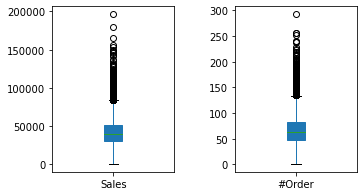

In [10]:
# Let's check the outliers of all numerical columns 

# First, import numpy and matplotlib.pyplot
# < your code here >


# Select only 'Sales' and '#Order' columns for plotting
df_to_plot = train_data[['Sales', '#Order']]

# plot box plots of 'Sales' and '#Order'
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

##### #Order and Sales contain outliers, but the distribution do not indicate data entry errors. Let's leave them like this.

### 1.4) Do you notice any patterns or anomalies in the data? Can you plot them?

#### Distribution Plots for categorical data

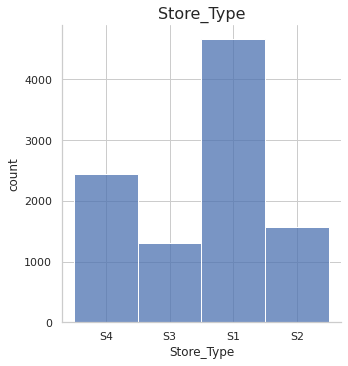

In [11]:
# import seaborn
import seaborn as sns
sns.set_theme(style="whitegrid") # seaborn 0.11.2

# Plot a distribution plot of 'Store_Type'
sns.displot(train_data['Store_Type'])
plt.title('Store_Type', size=16)
plt.ylabel('count');

Text(-1.6650000000000063, 0.5, 'count')

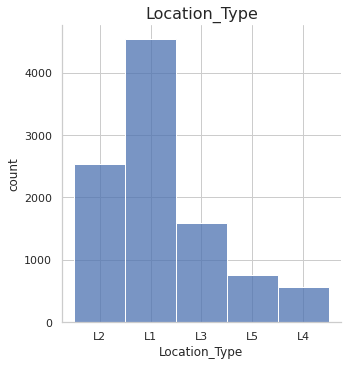

In [12]:
# plot a distribution plot of 'Location_Type'
# < your code here >


Text(-1.6650000000000063, 0.5, 'count')

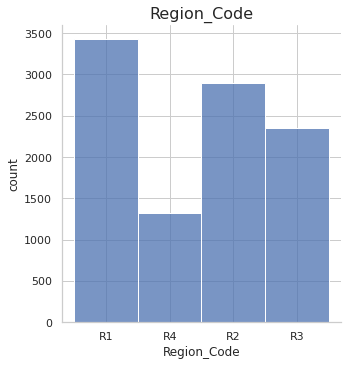

In [13]:
# plot a distribution plot of 'Region_Code'
# < your code here >


Text(-1.6650000000000063, 0.5, 'count')

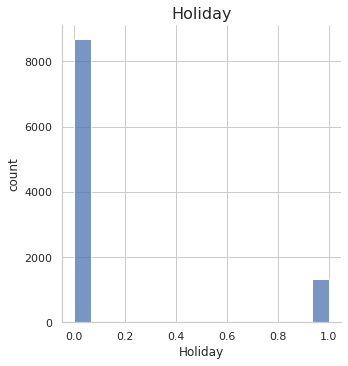

In [14]:
# plot a distribution plot of 'Holiday'
# < your code here >


Text(-1.6650000000000063, 0.5, 'count')

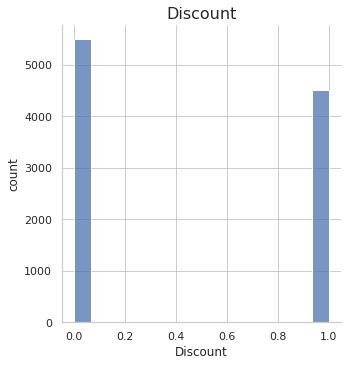

In [15]:
# plot a distribution plot of 'Discount'
# < your code here >


#### Distribution Plots for Numerical Data

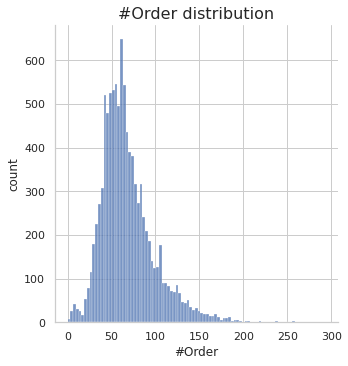

In [16]:
# plot a distribution plot of '#Order'
# < your code here >


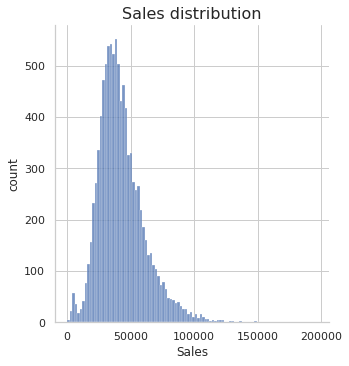

In [17]:
# plot a distribution plot of 'Sales'
# < your code here >


#### Box Plots
Let's plot some box plots to see the relationships between some of the attributes with 'Sales'

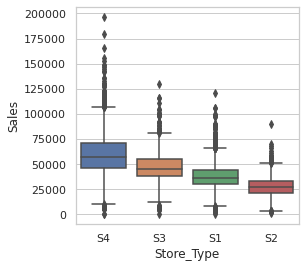

In [18]:
# Make a boxplot with x as 'Store_Type' and y as 'Sales'
plt.figure(figsize=(4,4))
sns.boxplot(x='Store_Type', y='Sales', data=train_data);

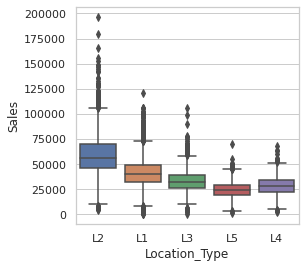

In [19]:
# Make a boxplot with x as 'Location_Type' and y as 'Sales'
# < your code here >


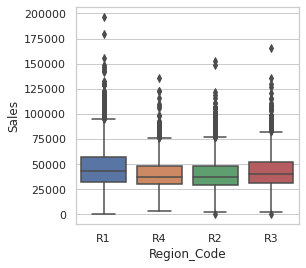

In [20]:
# Make a boxplot with x as 'Region_Code' and y as 'Sales'
# < your code here >


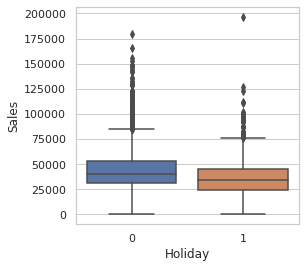

In [21]:
# Make a boxplot with x as 'Holiday' and y as 'Sales'
# < your code here >


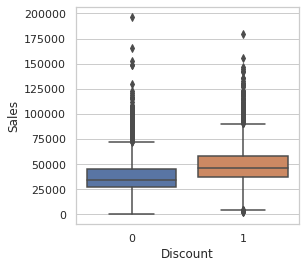

In [22]:
# Make a boxplot with x as 'Discount' and y as 'Sales'
# < your code here >


### Let's do some more Visualization

#### Which are the best stores (by number of sells)?

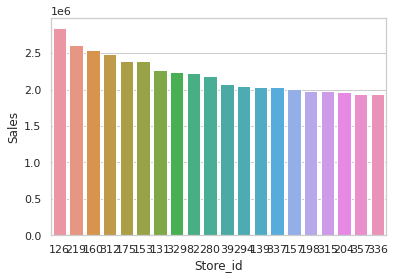

In [23]:
# First, get the sum of sales of each store
# Hint : do groupby 'Store_id' then sum their 'Sales' column
# < your code here >


# Sort the 'Sales' value from high to low
# < your code here >


# Select the top 20 stores with highest sales
top_best_stores = best_stores.head(20).reset_index(drop=True)

# Plot a barplot with 'Store_id' as x and 'Sales' as y
sns.barplot(x='Store_id', y='Sales', data=top_best_stores, order = top_best_stores['Store_id'] )

#### Which month has the highest Sales ?

Text(0, 0.5, 'Number of Sales')

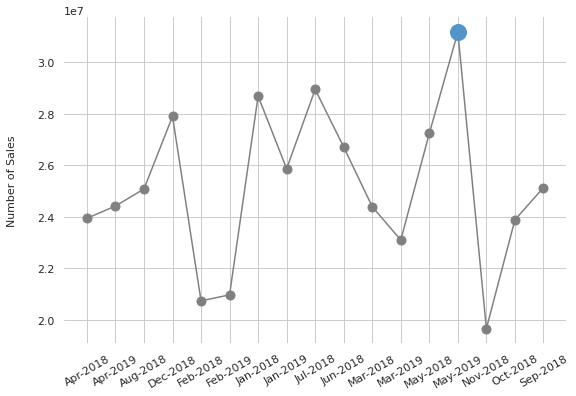

In [24]:
# Best months by sells
best_month = train_data.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))

best_month_1 = best_month.sort_values('Sales', ascending = False).head(1)

ax.plot(best_month.Month, best_month.Sales, marker='o', markerfacecolor='grey', color = 'gray', markersize=9)
ax.plot(best_month_1.Month, best_month_1.Sales, marker='o', markerfacecolor='#5495c9', color = '#5495c9', markersize=16)

plt.xticks(rotation=30)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Labels titles
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

#### Holiday Distribution by Sales

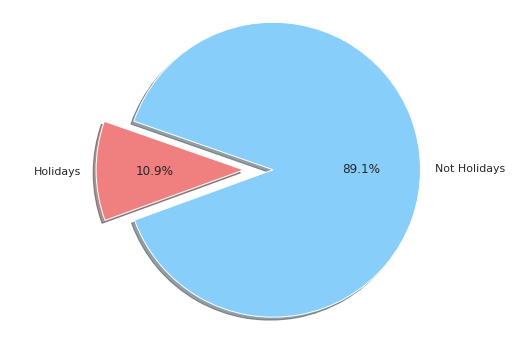

In [25]:
# Holidays Distribution
holiday = train_data.groupby(['Holiday'], as_index=False)['Sales'].sum()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

# Visualization
fig = plt.figure(figsize =(9, 6))

plt.pie(holiday['Sales'], 
        explode=(0.2, 0), 
        labels=['Not Holidays', 'Holidays'], 
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=200)
        
plt.axis('equal')
plt.show()

## 2) Statistical Analysis

In this workshop we will be training a machine learning model for Sales Prediction

The independent variables or X will be:

- Store_Type
- Location_Type
- Region_Code
- Date
- Holiday
- Discount

The dependent variable or y we will use in our model would be:
- Sales

In [26]:
# Remove column "ID" and "Store_id"
train_data = train_data.drop(columns=['ID','Store_id'], axis=1)

# do the same thing for test_data
# < your code here >


In [27]:
# Change the data type of 'Holiday', 'Discount' to int
train_data[['Holiday', 'Discount']] = train_data[['Holiday', 'Discount']].astype(int)

# do the same thing for test_data
# < your code here >

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store_Type     10000 non-null  object        
 1   Location_Type  10000 non-null  object        
 2   Region_Code    10000 non-null  object        
 3   Date           10000 non-null  datetime64[ns]
 4   Holiday        10000 non-null  int64         
 5   Discount       10000 non-null  int64         
 6   #Order         10000 non-null  int64         
 7   Sales          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 625.1+ KB


In [28]:
# Function for converting categorical column into one-hot encoded
from sklearn.preprocessing import OneHotEncoder
def convert_to_onehot(column_name, train_data, test_data=None, enc_column_names=None):
    enc = OneHotEncoder(handle_unknown='ignore')
    # Fit
    enc.fit(train_data[[column_name]])
    
    if enc_column_names is None:
        enc_column_names = list(enc.categories_[0])
#         print(enc_column_names)
    else: enc_column_names = enc_column_names
    
    # Transform
    enc_df = pd.DataFrame(enc.transform(train_data[[column_name]]).toarray(), columns=enc_column_names)
    
    # Join with the original df 
    train_data = train_data.join(enc_df)
    # drop the original columns
    train_data = train_data.drop(columns=[column_name], axis=1)
                            
    if test_data is not None:
        enc_df = pd.DataFrame(enc.transform(test_data[[column_name]]).toarray(), columns=enc_column_names)
        test_data = test_data.join(enc_df)
        test_data = test_data.drop(columns=[column_name], axis=1)
        return train_data, test_data
        
    return train_data

In [29]:
# Use the function given above to one-hot Encode categorical variables of 'Store_Type', 'Location_Type' and 'Region_Code'
train_data, test_data = convert_to_onehot('Store_Type', train_data, test_data)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location_Type  10000 non-null  object        
 1   Region_Code    10000 non-null  object        
 2   Date           10000 non-null  datetime64[ns]
 3   Holiday        10000 non-null  int64         
 4   Discount       10000 non-null  int64         
 5   #Order         10000 non-null  int64         
 6   Sales          10000 non-null  float64       
 7   S1             10000 non-null  float64       
 8   S2             10000 non-null  float64       
 9   S3             10000 non-null  float64       
 10  S4             10000 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 859.5+ KB


In [30]:
# do the same for column 'Location_Type' and 'Region_Code'
# < your code here >

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      10000 non-null  datetime64[ns]
 1   Holiday   10000 non-null  int64         
 2   Discount  10000 non-null  int64         
 3   #Order    10000 non-null  int64         
 4   Sales     10000 non-null  float64       
 5   S1        10000 non-null  float64       
 6   S2        10000 non-null  float64       
 7   S3        10000 non-null  float64       
 8   S4        10000 non-null  float64       
 9   L1        10000 non-null  float64       
 10  L2        10000 non-null  float64       
 11  L3        10000 non-null  float64       
 12  L4        10000 non-null  float64       
 13  L5        10000 non-null  float64       
 14  R1        10000 non-null  float64       
 15  R2        10000 non-null  float64       
 16  R3        10000 non-null  float64       
 17  R4        100

In [31]:
# One-hot encoding the Dates

# separate the Year, Month, Day_of_week, Weekday, Quater out from the Datetime object
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day_of_week'] = train_data['Date'].dt.dayofweek
train_data['Quarter'] = train_data['Date'].dt.quarter

# do the same thing with test_data
# < your code here >

# after getting all the attributes, drop the original Date column
train_data = train_data.drop(['Date'], axis = 1)

# do the same thing with test_data
# < your code here >

# one-hot encode 'Year', 'Month', 'Day_of_week', 'Quarter'
train_data, test_data = convert_to_onehot('Year', train_data, test_data)
train_data, test_data = convert_to_onehot('Month', train_data, test_data, enc_column_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
train_data, test_data = convert_to_onehot('Day_of_week', train_data, test_data, enc_column_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
train_data, test_data = convert_to_onehot('Quarter', train_data, test_data, enc_column_names = ['q1', 'q2', 'q3', 'q4'])

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Holiday   10000 non-null  int64  
 1   Discount  10000 non-null  int64  
 2   #Order    10000 non-null  int64  
 3   Sales     10000 non-null  float64
 4   S1        10000 non-null  float64
 5   S2        10000 non-null  float64
 6   S3        10000 non-null  float64
 7   S4        10000 non-null  float64
 8   L1        10000 non-null  float64
 9   L2        10000 non-null  float64
 10  L3        10000 non-null  float64
 11  L4        10000 non-null  float64
 12  L5        10000 non-null  float64
 13  R1        10000 non-null  float64
 14  R2        10000 non-null  float64
 15  R3        10000 non-null  float64
 16  R4        10000 non-null  float64
 17  2018      10000 non-null  float64
 18  2019      10000 non-null  float64
 19  jan       10000 non-null  float64
 20  feb       10000 non-null  flo

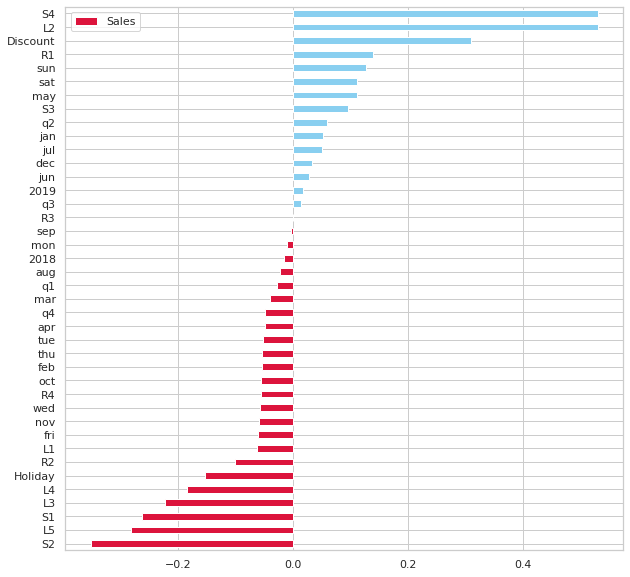

In [32]:
# Checking the target's correlation with other variables will be helpful to determine with features are not crucial for the prediction.
corr = train_data[train_data.columns].corr()['Sales'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.Sales > 0.90].index)

ax = corr.plot.barh(y='Sales', rot=0, color = np.where(corr['Sales'] < 0, 'crimson', '#89CFF0'), figsize=(10,10))

In [33]:
# print shape of train and test data
# < your code here >

(10000, 42)
(2000, 40)


In [34]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(train_data)
clean_dataset(test_data)

,Holiday,Discount,S1,S2,S3,S4,L1,L2,L3,L4,...,tue,wed,thu,fri,sat,sun,q1,q2,q3,q4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1996,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_train = train_data.drop(columns=['Sales', '#Order'], axis=1).to_numpy()
y_train = train_data.loc[:, ['Sales']].to_numpy().squeeze(1)

X_test = test_data.to_numpy()

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)

(10000, 40)
(10000,)
(2000, 40)


### Split the Data

In [36]:
from sklearn.model_selection import train_test_split

# < your code here >

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

### Is it a Regression or Classification problem ?

Given the independent variables, we would like to predict the continuous value of Sales amount so this is a Regression problem.

### Is it a Supervised or Unsupervised problem ?

We got the train data that include the real Sales value so our model can learn from that. Hence, this is a supervised problem.


Thus, we will be using Supervised Regression Models.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predictive_models(X_train, y_train, X_test, y_test):
    # models that we will be using, put them in a list
    algorithms = [SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0), 
                 XGBRegressor()]
    # The names of the models
    algorithm_names = ["SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor", "XGBRegressor"]
    
    # Create 3 lists which we will be appending values caluclated during training to
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    # Create 3 lists which we will be appending values caluclated during testing to
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        
        # fit your model
        # Your code here
        model.fit(X_train,y_train)  #fit means learn the pattern
        
        # Predict your model, one for X_test and one for X_train
        # Your code here
        y_test_predict = model.predict(X_test)   #predict, which means asking the model to predict UNSEEN data
        y_train_predict = model.predict(X_train)
        
        # Calculate mean square error and mean absolute error of traing data
        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)
        
        # Calculate mean square error and mean absolute error of testing data
        # Your code here
        mse_2 = round(mean_squared_error(y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(y_test, y_test_predict),4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
                
        # Appending the Errors into the list for testing data
        Mean_Squared_Error_Testing.append(mse_2)
        Mean_Absolute_Error_Testing.append(mae_2)
        
    # Creating DataFrame for Logs of Models and their errors    
    results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing})

    return results

In [41]:
results = predictive_models(X_train, y_train, X_val, y_val)
results

,Models,Mean Squared Error Training,Mean Absolute Error Training,Mean Squared Error Testing,Mean Absolute Error Testing
0,SVR,3.488314e+08,13567.4706,3.536017e+08,13679.8616
1,KNeighbors Regressor,1.108208e+08,7585.5625,1.785819e+08,9521.4379
2,Decision-Tree Regressor,4.043327e+07,3368.3863,2.085373e+08,10138.9481
3,Random-Forest Regressor,4.913262e+07,4675.7204,1.610829e+08,8743.4084
4,XGBRegressor,6.739865e+07,5749.4200,1.438898e+08,8218.3478


After we have selected the best model for our data, let's train the model again and test the performance on our validation set

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# < your code here >

mse =  143889761.18951625
mae =  8218.347818889648
r2 =  0.5833498213043409


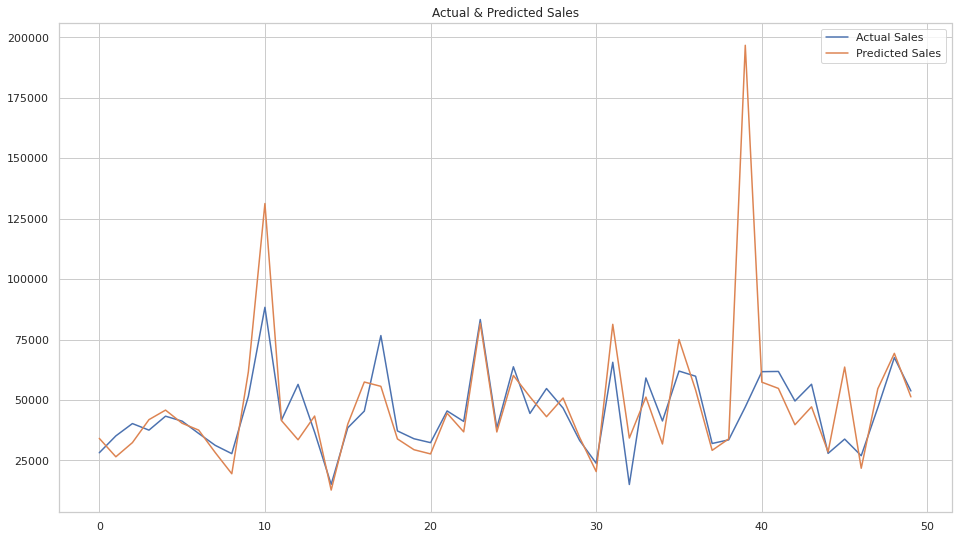

In [46]:
test = pd.DataFrame(
    {'Predicted Sales':y_val_pred, 'Actual Sales':y_val}
)

fig= plt.figure(
    figsize=(16, 9)
)

test = test.reset_index()
test = test.drop(
    ['index'],axis=1
)

plt.plot(test[:50])
plt.legend(['Actual Sales','Predicted Sales'])
plt.title('Actual & Predicted Sales')
plt.show()

#### Let's also try to predict the sales of test_data set

In [48]:
# < your code here >

   Holiday  Discount   S1   S2   S3   S4   L1   L2   L3   L4  ...  tue  wed  \
0        0         0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
1        0         0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
2        0         0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3        0         1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0   
4        0         0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0   
5        0         1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6        0         1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
7        0         1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
8        0         1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
9        0         0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

   thu  fri  sat  sun   q1   q2   q3   q4  
0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 

### Reference : 

https://www.kaggle.com/miguelfzzz/store-sales-prediction-analysis/data?select=TEST_FINAL.csv

https://www.kaggle.com/knightbearr/suplement-sales-prediction-easy-way-knightbearr

https://www.kaggle.com/miguelfzzz/store-sales-prediction-analysis/notebook